In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("all_analyzed.csv")
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,ride_length,day_of_week,is_holiday,work_day,distance,rush_hour,speed,ride_length_category
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,...,-87.638506,member,11.750000,1,False,1,3.104577,1,0.264219,"(0.0, 30.0]"
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),A15541-1,Michigan Ave & 8th St,A623-1,41.869621,-87.623981,...,-87.623981,casual,1.883333,1,False,1,0.350123,0,0.185906,"(0.0, 30.0]"
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),A15541-1,Michigan Ave & 8th St,A623-1,41.869621,-87.623981,...,-87.623981,casual,7.716667,6,False,0,0.350123,0,0.045372,"(0.0, 30.0]"
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),A15541-1,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,...,-87.596471,casual,58.483333,6,False,0,8.569135,0,0.146523,"(30.0, 60.0]"
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,...,-87.652662,member,26.300000,2,False,1,5.418878,0,0.206041,"(0.0, 30.0]"


# Size

In [4]:
ratio = df.groupby('member_casual').size() / len(df) * 100
ratio

member_casual
casual    38.831625
member    61.168375
dtype: float64

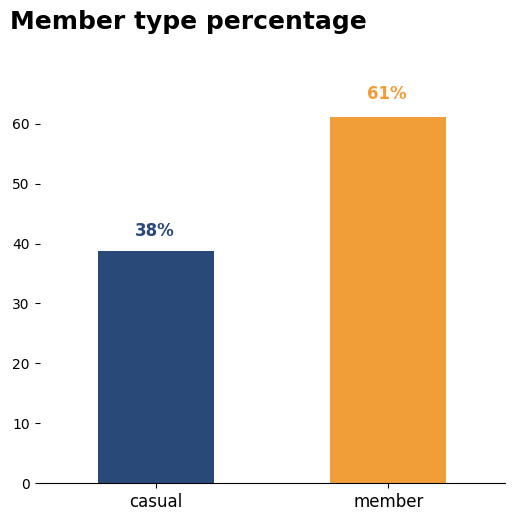

In [67]:
fig_ratio, ax_ratio = plt.subplots(figsize=(6, 5))
ratio.plot.bar(ax=ax_ratio, color=['#294979', '#F19D38'])

# set title
ax_ratio.set_title('Member type percentage', fontsize=18, fontweight='bold', x=0.32, pad=50)

# set x axis
ax_ratio.set_xticklabels(["casual","member"], rotation=0, fontsize='large') 
ax_ratio.set_xlabel('')

# hide spines
ax_ratio.spines['top'].set_visible(False)
ax_ratio.spines['right'].set_visible(False)
ax_ratio.spines['left'].set_visible(False)

# add percentage above bars
for i, v in enumerate(ratio):
    if i % 2 == 1:
        ax_ratio.text(i-0.09, v+3, str(int(v))+'%', color='#F19D38', fontweight='bold', fontsize='large')
    else:
        ax_ratio.text(i-0.09, v+2.5, str(int(v))+'%', color='#294979', fontweight='bold', fontsize='large')

## Conclusion
Member has a bigger portion

# Distance

In [61]:
dist = df.groupby('member_casual').agg({'distance': ['mean', 'median', 'max', 'min']})
dist

distance                            
                   mean    median          max  min
member_casual                                      
casual         2.134677  1.612688  9817.319464  0.0
member         2.105076  1.505767  9818.679967  0.0

In [62]:
dist = dist.reset_index()

In [64]:
dist_member = df[df['member_casual']=='member']['distance'].dropna()
dist_casual = df[df['member_casual']=='casual']['distance'].dropna()

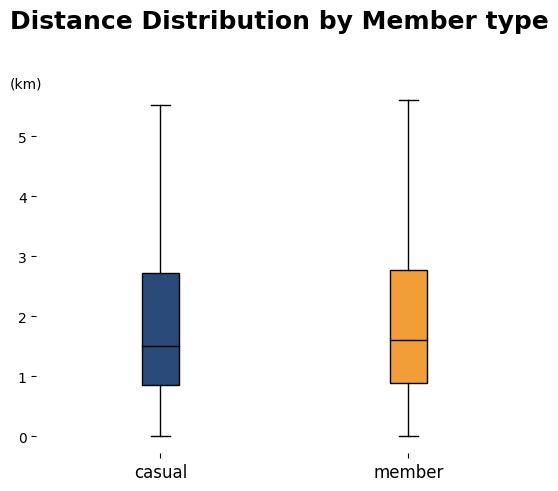

In [83]:
fig_dist, ax_dist = plt.subplots()
boxplot_dist = ax_dist.boxplot([dist_member, dist_casual], showfliers=False, patch_artist=True) # no fliers

ax_dist.set_title('Distance Distribution by Member type', fontsize=18, fontweight='bold', x=0.49, pad=40)

# fill box color
colors = ['#294979','#F19D38']
for patch, color in zip(boxplot_dist['boxes'], colors):
        patch.set_facecolor(color)

# add median line color
for median in boxplot_dist['medians']:
    median.set_color('black')

# set x axis
ax_dist.set_xticklabels(["casual","member"], rotation=0, fontsize='large') 
ax_dist.set_xlabel('')

# set y axis label location
ax_dist.set_ylabel('(km)', rotation="horizontal")
ax_dist.yaxis.set_label_coords(-0.02, 0.98)

# hide spines
ax_dist.spines['top'].set_visible(False)
ax_dist.spines['right'].set_visible(False)
ax_dist.spines['left'].set_visible(False)
ax_dist.spines['bottom'].set_visible(False)

## Conclusion
No big difference between casual and member

# Length of ride

In [36]:
length = df.groupby('member_casual').agg({'ride_length': ['mean', 'median']})
length

ride_length       
                     mean median
member_casual                   
casual          27.729068  12.00
member          12.379864   8.55

In [37]:
length = length.reset_index()

Text(0.75, -2, 'Median Length')

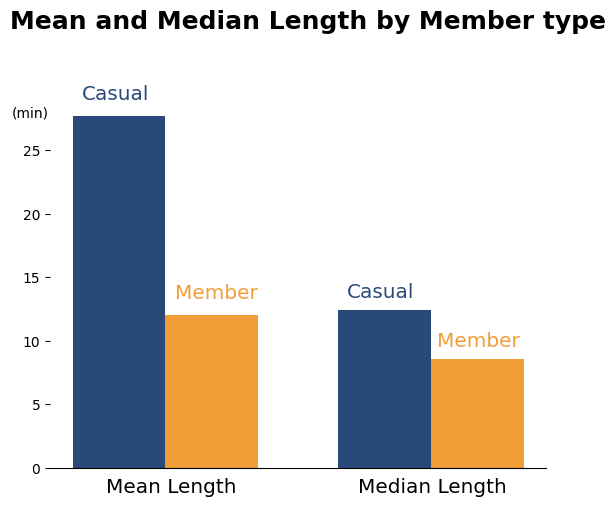

In [38]:
member_casual = length['member_casual']
mean_length = [length['ride_length']['mean'][0], length['ride_length']['mean'][1]]
median_length = [length['ride_length']['median'][0], length['ride_length']['median'][1]]

x = np.arange(len(member_casual))

fig_length, ax_length = plt.subplots()
ax_length.bar(x-0.15, mean_length, 0.35, color='#294979')
ax_length.bar(x+0.2, median_length, 0.35, color='#F19D38')

ax_length.set_title('Mean and Median Length by Member type', fontsize=18, fontweight='bold', x=0.52, pad=50)

ax_length.get_xaxis().set_visible(False)
ax_length.set_ylabel('(min)', rotation="horizontal")
ax_length.yaxis.set_label_coords(-0.04, 0.94)

ax_length.spines['top'].set_visible(False)
ax_length.spines['right'].set_visible(False)
ax_length.spines['left'].set_visible(False)

ax_length.text(-0.29, 29, 'Casual',  fontsize='x-large', color='#294979')
ax_length.text(0.71, 13.4, 'Casual',  fontsize='x-large', color='#294979')

ax_length.text(0.06, 13.3, 'Member',  fontsize='x-large', color='#F19D38')
ax_length.text(1.05, 9.55, 'Member',  fontsize='x-large', color='#F19D38')

ax_length.text(-0.2, -2, 'Mean Length',  fontsize='x-large')
ax_length.text(0.75, -2, 'Median Length',  fontsize='x-large')

## Conclusion
Casuals spend more time than members

# Length group

In [39]:
df['ride_length_category'] = df['ride_length_category'].astype("category")
df['ride_length_category'] = df['ride_length_category'].cat.set_categories(['(0.0, 30.0]', '(30.0, 60.0]', '(60.0, 120.0]', '(120.0, inf]'], ordered=True)

In [40]:
length_group = df.groupby(['ride_length_category', 'member_casual']).size() / df.groupby('member_casual').size() * 100
length_group

ride_length_category  member_casual
(0.0, 30.0]           casual           83.498466
                      member           94.216241
(30.0, 60.0]          casual           10.893340
                      member            5.072765
(60.0, 120.0]         casual            4.121730
                      member            0.485546
(120.0, inf]          casual            1.474790
                      member            0.216622
dtype: float64

In [41]:
length_group = length_group.unstack('ride_length_category')
length_group

ride_length_category,"(0.0, 30.0]","(30.0, 60.0]","(60.0, 120.0]","(120.0, inf]"
member_casual,,,,
casual,83.498466,10.893340,4.121730,1.474790
member,94.216241,5.072765,0.485546,0.216622


Text(0.91, 47.10812029445643, '94.2%')

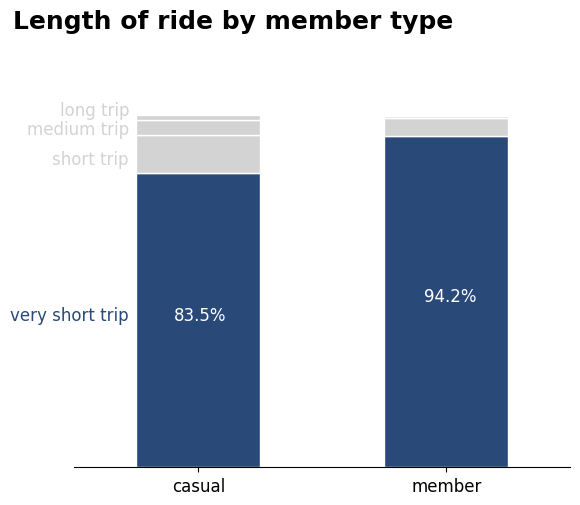

In [42]:
colors = ['#294979', 'lightgrey', 'lightgrey', 'lightgrey']  # Customize the colors as needed
cmap = ListedColormap(colors)

ax_length_group = length_group.plot(kind='bar', stacked=True, cmap=cmap, edgecolor='white')

ax_length_group.set_title('Length of ride by member type', fontweight='bold', fontsize=18,  x=0.32, pad=50)
ax_length_group.set_xticklabels(['casual', 'member'], rotation=0, fontsize='large')
ax_length_group.set_xlabel('')
ax_length_group.get_yaxis().set_visible(False)

ax_length_group .spines['top'].set_visible(False)
ax_length_group .spines['right'].set_visible(False)
ax_length_group .spines['left'].set_visible(False)

# remove legend
ax_length_group.get_legend().remove()

ax_length_group.text(-0.76, length_group.iloc[0, 0]/2, 'very short trip', color='#294979', fontsize='large')
ax_length_group.text(-0.59, 86, 'short trip', color='lightgrey', fontsize='large')
ax_length_group.text(-0.69, 94.5, 'medium trip', color='lightgrey', fontsize='large')
ax_length_group.text(-0.56, 100, 'long trip', color='lightgrey', fontsize='large')

ax_length_group.text(-0.1, length_group.iloc[0, 0]/2, str(format(length_group.iloc[0, 0], '.1f'))+'%', color='white', fontsize='large')
ax_length_group.text(0.91, length_group.iloc[1, 0]/2, str(format(length_group.iloc[1, 0], '.1f'))+'%', color='white', fontsize='large')


Text(0.94, 95.5, '5.1%')

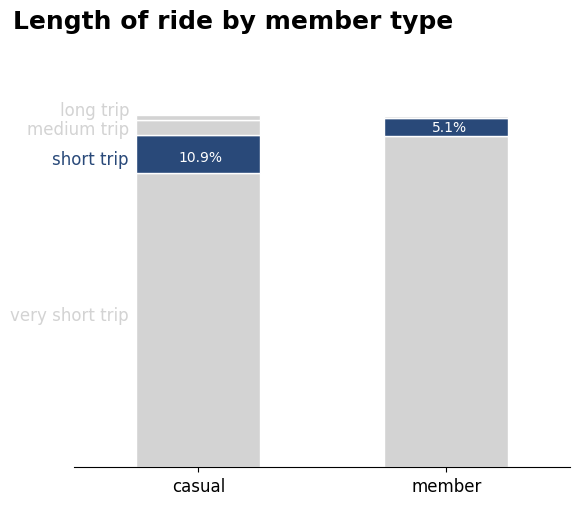

In [89]:
colors = ['lightgrey', '#294979', 'lightgrey', 'lightgrey']  # Customize the colors as needed
cmap = ListedColormap(colors)

ax_length_group = length_group.plot(kind='bar', stacked=True, cmap=cmap, edgecolor='white')

ax_length_group.set_title('Length of ride by member type', fontweight='bold', fontsize=18,  x=0.32, pad=50)
ax_length_group.set_xticklabels(['casual', 'member'], rotation=0, fontsize='large')
ax_length_group.set_xlabel('')
ax_length_group.get_yaxis().set_visible(False)

ax_length_group .spines['top'].set_visible(False)
ax_length_group .spines['right'].set_visible(False)
ax_length_group .spines['left'].set_visible(False)

# remove legend
ax_length_group.get_legend().remove()

ax_length_group.text(-0.76, length_group.iloc[0, 0]/2, 'very short trip', color='lightgrey', fontsize='large')
ax_length_group.text(-0.59, 86, 'short trip', color='#294979', fontsize='large')
ax_length_group.text(-0.69, 94.5, 'medium trip', color='lightgrey', fontsize='large')
ax_length_group.text(-0.56, 100, 'long trip', color='lightgrey', fontsize='large')

ax_length_group.text(-0.08, 87, str(format(length_group.iloc[0, 1], '.1f'))+'%', color='white')
ax_length_group.text(0.94, 95.5, str(format(length_group.iloc[1, 1], '.1f'))+'%', color='white')

Text(0.94, 103, '0.7%')

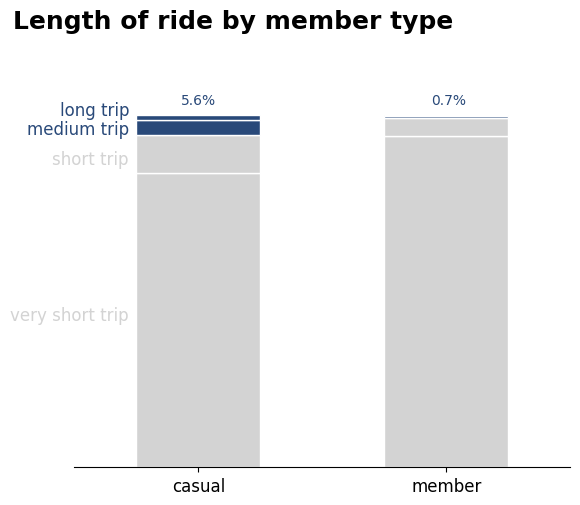

In [44]:
colors = ['lightgrey', 'lightgrey', '#294979', '#294979']  # Customize the colors as needed
cmap = ListedColormap(colors)

ax_length_group = length_group.plot(kind='bar', stacked=True, cmap=cmap, edgecolor='white')

ax_length_group.set_title('Length of ride by member type', fontweight='bold', fontsize=18,  x=0.32, pad=50)
ax_length_group.set_xticklabels(['casual', 'member'], rotation=0, fontsize='large')
ax_length_group.set_xlabel('')
ax_length_group.get_yaxis().set_visible(False)

ax_length_group .spines['top'].set_visible(False)
ax_length_group .spines['right'].set_visible(False)
ax_length_group .spines['left'].set_visible(False)

# remove legend
ax_length_group.get_legend().remove()

ax_length_group.text(-0.76, length_group.iloc[0, 0]/2, 'very short trip', color='lightgrey', fontsize='large')
ax_length_group.text(-0.59, 86, 'short trip', color='lightgrey', fontsize='large')
ax_length_group.text(-0.69, 94.5, 'medium trip', color='#294979', fontsize='large')
ax_length_group.text(-0.56, 100, 'long trip', color='#294979', fontsize='large')

ax_length_group.text(-0.07, 103, str(format(length_group.iloc[0, 2]+length_group.iloc[0, 3], '.1f'))+'%', color='#294979')
ax_length_group.text(0.94, 103, str(format(length_group.iloc[1, 2]+length_group.iloc[1, 3], '.1f'))+'%', color='#294979')

## Conclusion
94.2% of members spend less than 30 minutes on the bike in comparison of 83.5% of casuals. <br>
5.1% of members spend 30-60 minutes on the bike in comparison of 10.9% of casuals. <br>
0.7% of members spend more than 60 minutes on the bike in comparison of 5.6% of casuals. <br>

# difference across year

In [45]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['month'] = df['started_at'].dt.strftime('%Y-%m')

In [46]:
df.groupby(['member_casual', 'month']).size() 

member_casual  month  
casual         2022-07    406055
               2022-08    358924
               2022-09    296697
               2022-10    208989
               2022-11    100772
               2022-12     44894
               2023-01     40008
               2023-02     43016
               2023-03     62201
               2023-04    147285
               2023-05    234181
               2023-06    301230
member         2022-07    417433
               2022-08    427008
               2022-09    404642
               2022-10    349696
               2022-11    236963
               2022-12    136912
               2023-01    150293
               2023-02    147429
               2023-03    196477
               2023-04    279305
               2023-05    370646
               2023-06    418388
dtype: int64

In [47]:
month = df.groupby(['member_casual', 'month']).size() / df.groupby(['month']).size() * 100
month

member_casual  month  
casual         2022-07    49.309158
               2022-08    45.668582
               2022-09    42.304364
               2022-10    37.407305
               2022-11    29.837595
               2022-12    24.693354
               2023-01    21.023536
               2023-02    22.587099
               2023-03    24.045725
               2023-04    34.526126
               2023-05    38.718675
               2023-06    41.859709
member         2022-07    50.690842
               2022-08    54.331418
               2022-09    57.695636
               2022-10    62.592695
               2022-11    70.162405
               2022-12    75.306646
               2023-01    78.976464
               2023-02    77.412901
               2023-03    75.954275
               2023-04    65.473874
               2023-05    61.281325
               2023-06    58.140291
dtype: float64

Text(11.2, 41, 'casual')

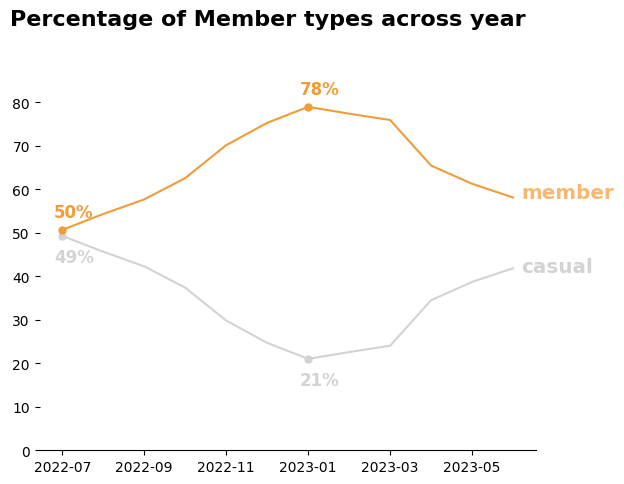

In [48]:
ax_month = month.unstack('member_casual').plot(color=['lightgrey', (0.94, 0.61, 0.22)], marker='.', markevery=[0, 6], markersize=10)

ax_month.set_title('Percentage of Member types across year', fontweight='bold', fontsize=16,  x=0.46, pad=40)
ax_month.set_ylim(0, 85)
ax_month.set_xlabel('')
# hide all spines
ax_month.spines['top'].set_visible(False)
ax_month.spines['right'].set_visible(False)
ax_month.spines['left'].set_visible(False)
# ax_rush_hour.spines['bottom'].set_visible(False)

# remove legend
ax_month.get_legend().remove()

# set the essential on the plot
for i, v in enumerate(month):
    if i % 6 == 0:
        if i > 6:
            ax_month.text(i-12.2, v+3, str(int(v))+'%', color=(0.94, 0.61, 0.22), fontweight='bold', fontsize='large')
        else:
            ax_month.text(i-0.2, v-6, str(int(v))+'%', color='lightgrey', fontweight='bold', fontsize='large')

ax_month.text(11.2, 58, 'member', color=(0.94, 0.61, 0.22), alpha=0.7, fontweight='bold', fontsize='x-large')
ax_month.text(11.2, 41, 'casual', color='lightgrey', fontweight='bold', fontsize='x-large')

## Conclusion
The percentage of casual sharply decreases when it comes to winter (49%->21%).

# Work day

In [49]:
work_day = df.groupby(['work_day', 'member_casual']).size() / df.groupby('work_day').size() * 100
work_day

work_day  member_casual
0         casual           48.769579
          member           51.230421
1         casual           34.814287
          member           65.185713
dtype: float64

Text(0.86, 6, 'work day')

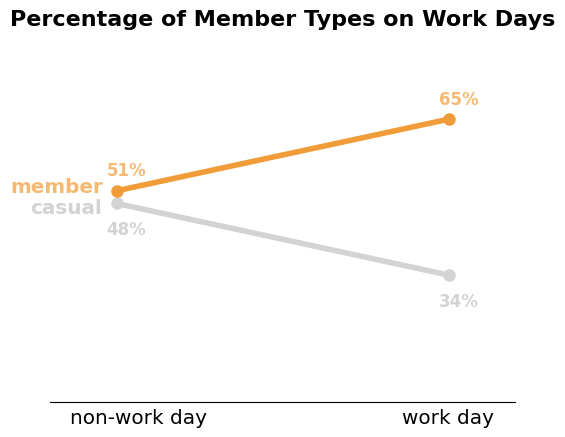

In [50]:
ax_work_day = work_day.unstack('member_casual').plot(figsize=(6, 4),color=['lightgrey', (0.94, 0.61, 0.22)], linewidth=4, marker='.', markersize=16)

# title setting
ax_work_day.set_title('Percentage of Member Types on Work Days', fontweight='bold', fontsize=16,  x=0.5, pad=50)

# set the range of x and y axis
ax_work_day.set_xlim(-0.2, 1.2)
ax_work_day.set_ylim(10, 70)

# hide x and y axis
ax_work_day.get_xaxis().set_visible(False)
ax_work_day.get_yaxis().set_visible(False)

# hide all spines
ax_work_day.spines['top'].set_visible(False)
ax_work_day.spines['right'].set_visible(False)
ax_work_day.spines['left'].set_visible(False)

# remove legend
ax_work_day.get_legend().remove()

# set the essential on the plot
for i, v in enumerate(work_day):
    if i % 2 == 1:
        ax_work_day.text(int(i/2)-0.03, v+3, str(int(v))+'%', color=(0.94, 0.61, 0.22), alpha=0.7, fontweight='bold', fontsize='large')
    else:
        ax_work_day.text(int(i/2)-0.03, v-6, str(int(v))+'%', color='lightgrey', fontweight='bold', fontsize='large')

ax_work_day.text(-0.32, 51, 'member', color=(0.94, 0.61, 0.22), alpha=0.7, fontweight='bold', fontsize='x-large')
ax_work_day.text(-0.26, 47, 'casual', color='lightgrey', fontweight='bold', fontsize='x-large')

ax_work_day.text(-0.14, 6, 'non-work day',  fontsize='x-large')
ax_work_day.text(0.86, 6, 'work day',  fontsize='x-large')


## Conclusion
On non-work day, the percentages between members and casuals are almost the same, but when it comes to work day, the percentage of members increases.

# Rush hour

In [53]:
rush_hour = df.groupby(['rush_hour', 'member_casual']).size() / df.groupby('rush_hour').size() * 100
rush_hour

rush_hour  member_casual
0          casual           42.855196
           member           57.144804
1          casual           31.142981
           member           68.857019
dtype: float64

Text(0.86, 6, 'rush hour')

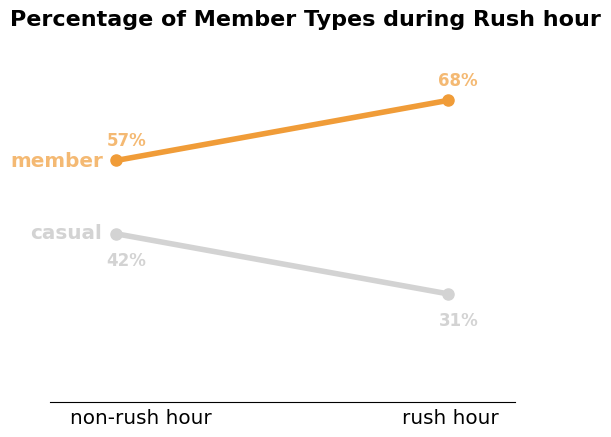

In [54]:
ax_rush_hour = rush_hour.unstack('member_casual').plot(figsize=(6, 4),  color=['lightgrey', (0.94, 0.61, 0.22)], linewidth=4, marker='.', markersize=16)

# title setting
ax_rush_hour.set_title('Percentage of Member Types during Rush hour', fontweight='bold', fontsize=16,  x=0.55, pad=50)

# set the range of x and y axis
ax_rush_hour.set_xlim(-0.2, 1.2)
ax_rush_hour.set_ylim(10, 70)

# hide x and y axis
ax_rush_hour.get_xaxis().set_visible(False)
ax_rush_hour.get_yaxis().set_visible(False)

# hide all spines
ax_rush_hour.spines['top'].set_visible(False)
ax_rush_hour.spines['right'].set_visible(False)
ax_rush_hour.spines['left'].set_visible(False)

# remove legend
ax_rush_hour.get_legend().remove()

# set the essential on the plot
for i, v in enumerate(rush_hour):
    if i % 2 == 1:
        ax_rush_hour.text(int(i/2)-0.03, v+3, str(int(v))+'%', color=(0.94, 0.61, 0.22), alpha=0.7, fontweight='bold', fontsize='large')
    else:
        ax_rush_hour.text(int(i/2)-0.03, v-6, str(int(v))+'%', color='lightgrey', fontweight='bold', fontsize='large')

ax_rush_hour.text(-0.32, 56, 'member', color=(0.94, 0.61, 0.22), alpha=0.7, fontweight='bold', fontsize='x-large')
ax_rush_hour.text(-0.26, 42, 'casual', color='lightgrey', fontweight='bold', fontsize='x-large')

ax_rush_hour.text(-0.14, 6, 'non-rush hour',  fontsize='x-large')
ax_rush_hour.text(0.86, 6, 'rush hour',  fontsize='x-large')


## Conclusion
On day, the percentage of members increases.